<a href="https://colab.research.google.com/github/vanesamp07/Python/blob/main/Renuncias_clientes_desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Analisis de datos
import pandas as pd #Calculos númericos
import numpy as np #Manipulación de datos de DF
import matplotlib.pyplot as plt #Graficas
import seaborn as sns #Graficos

#Series de tiempo
import statsmodels as ss
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import sys
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import mse, rmse, meanabs
from datetime import datetime

#Estadística
from scipy.stats import ttest_ind

#Machine learning
from scipy.stats import chi2
from scipy.stats import chi2_contingency
import scipy.stats as stats
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split #División de datos en entrenamiento y prueba
from sklearn.metrics import classification_report
from scipy.stats import mode
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #Métricas de evaluación regresivas
from sklearn.metrics import roc_curve #Métrica de evaluación (area bajo la curca)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score #Métricas de evaluación clasificación
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve #Metricas de evaluación clasificatorias
from sklearn.preprocessing import StandardScaler #Estandarización
from sklearn.preprocessing import MinMaxScaler #Normalización
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_blobs, make_circles


#Ensamble
#Bagging
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor #Arboles de decisión regresivos
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor #Ensambles paralelos y arboles de decisión regresivos
from sklearn.model_selection import GridSearchCV #Busqueda por grilla
from sklearn.ensemble import RandomForestClassifier #Arboles de decisión clasificatorios
#Boosting
from sklearn.ensemble import AdaBoostClassifier #Modelo de ensamble secuencial
from sklearn.ensemble import GradientBoostingClassifier #Modelo de ensamble secuencial
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

#SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

#Regularización
from sklearn.linear_model import ElasticNet, ElasticNetCV

### PREDICCIÓN DE RENUNCIAS DE CLIENTES EN UNA COMPAÑIA DE TELECOMUNICACIONES

In [ ]:
df = pd.read_csv("Customer Churn.csv")

In [ ]:
df1 = df.copy()

In [ ]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [ ]:
df.tail()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.98,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.21,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.32,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.64,0
3149,8,1,11,2,1792,25,7,9,3,1,1,30,100.68,1


In [ ]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

Call Failures: Número de fallos de llamadas

Complaints: Quejas (1) o ninguna queja (0)

Subscription Length: Meses totales de suscripción

Charge Amount: Importe del cargo, atributo ordinal (0: importe más bajo, 9: importe más alto)

Seconds of Use: Segundos totales de llamadas

Frequency of use: Número total de llamadas

Frequency of SMS: Número total de mensajes de texto

Distinct Called Numbers: Número total de llamadas distintas

Age Group: Grupo de edad, atributo ordinal (1: menor edad, 5: mayor edad)

Tariff Plan: Plan de tarifa, binario (1: pago por uso, 2: contractual)

Status: Estado, binario (1: activo, 2: inactivo)

Churn: Renuncia, binario (1: cancelación, 0: no cancelación) - Etiqueta de clase

Customer Value: El valor calculado del cliente

In [ ]:
print(df.shape)

(3150, 14)


#### PREPROCESAMIENTO DE DATOS

CHURN = VARIABLE OBJETIVO

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [ ]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
#Clientes sin quejas: o
#Clientes con quejas: 1
df["Complains"].value_counts()

Complains
0    2909
1     241
Name: count, dtype: int64

In [ ]:
#Importe del cargo (0 mas bajo, 10 mas alto)
df["Charge  Amount"].value_counts()

Charge  Amount
0     1768
1      617
2      395
3      199
4       76
5       30
8       19
9       14
7       14
6       11
10       7
Name: count, dtype: int64

In [ ]:
df["Age Group"].value_counts()

Age Group
3    1425
2    1037
4     395
5     170
1     123
Name: count, dtype: int64

In [ ]:
#Plan de tarifa
#Pago por uso: 0
#Contractual: 1
df["Tariff Plan"].value_counts()

Tariff Plan
1    2905
2     245
Name: count, dtype: int64

In [ ]:
#Estado binario
#Activo: 1
#Inactivo: 2
df["Status"].value_counts()

Status
1    2368
2     782
Name: count, dtype: int64

In [ ]:
#Renuncia
#Canelación: 1
#No cancelación: 0
df["Churn"].value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

In [ ]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

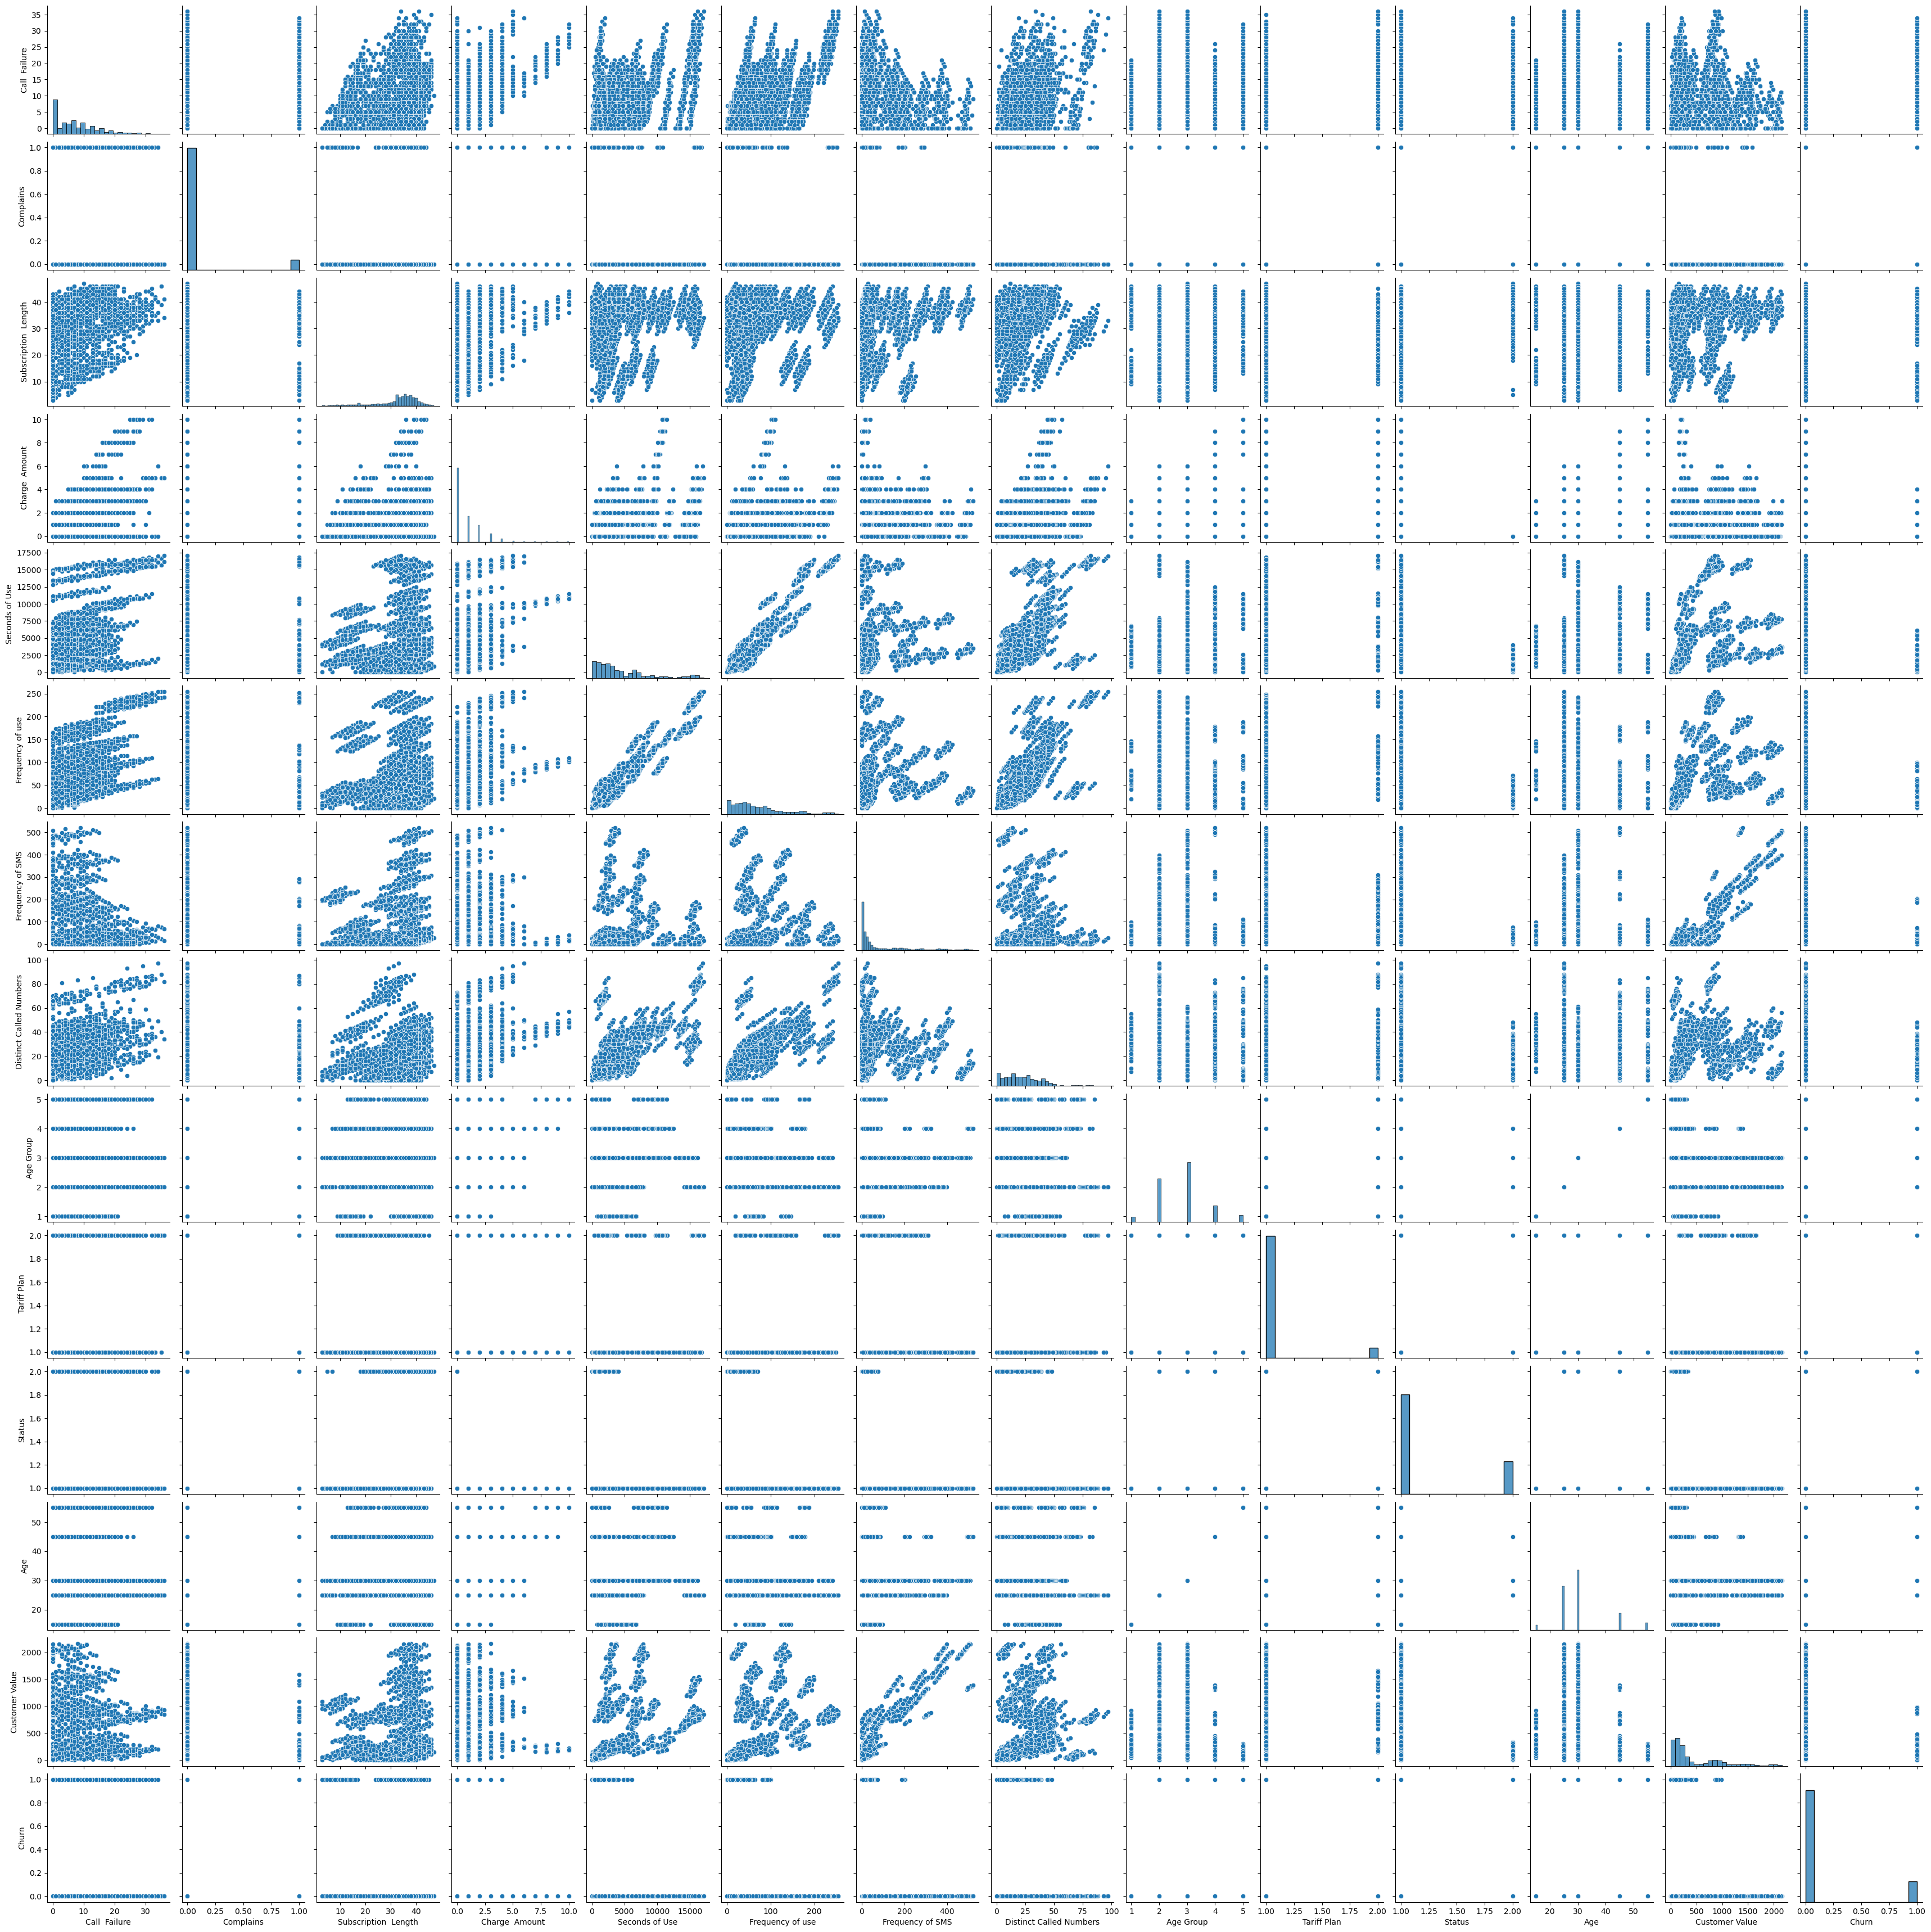

In [ ]:
sns.pairplot(df)

In [ ]:
df[df.duplicated()].sum()

Call  Failure                 1791.00
Complains                       11.00
Subscription  Length         10016.00
Charge  Amount                 192.00
Seconds of Use             1165655.00
Frequency of use             17919.00
Frequency of SMS             20200.00
Distinct Called Numbers       6025.00
Age Group                      822.00
Tariff Plan                    316.00
Status                         398.00
Age                           9075.00
Customer Value              129842.14
Churn                           49.00
dtype: float64

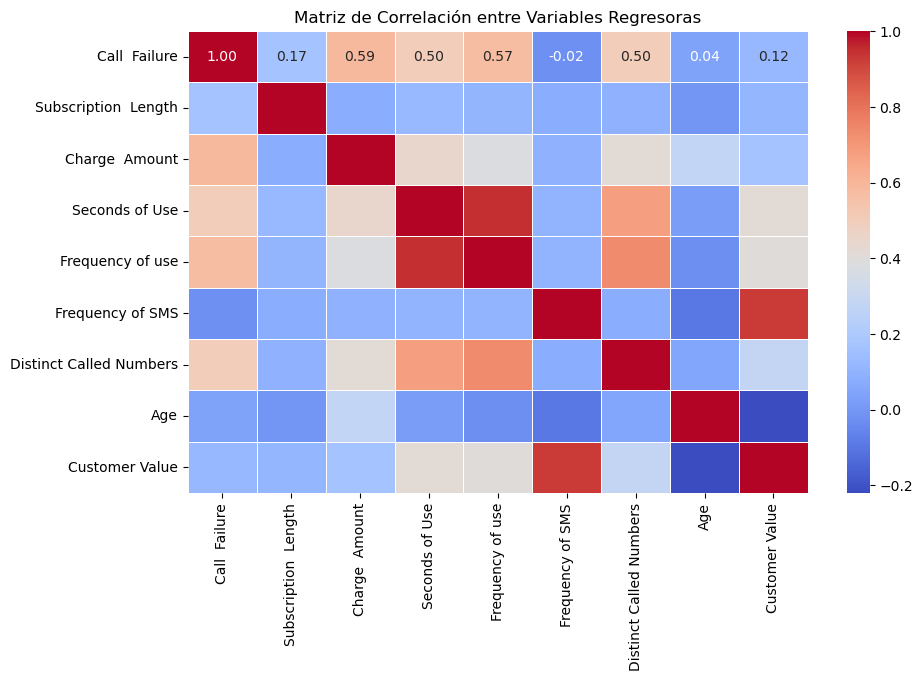

In [ ]:
# Seleccionar solo las variables regresoras
# No se tiene cuenta la variable objetivo ni variables categoricas
objetivos_y_categoricas = df.drop(columns=['Churn', "Complains", "Age Group", "Tariff Plan", "Status"], errors='ignore')

# Calcular la matriz de correlación
corr_matrix = objetivos_y_categoricas.corr()

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Regresoras')
plt.show()

In [ ]:
df.corr()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
Call Failure,1.000000,0.152879,0.169737,0.589028,0.501607,0.573349,-0.022282,0.504058,0.050406,0.192285,-0.114645,0.041758,0.121225,-0.008987
Complains,0.152879,1.000000,-0.020286,-0.033948,-0.104952,-0.090774,-0.111633,-0.058199,0.019976,0.001140,0.271405,0.003298,-0.132895,0.532053
Subscription Length,0.169737,-0.020286,1.000000,0.078789,0.124618,0.106534,0.076318,0.092009,0.021453,-0.159680,0.142841,-0.002430,0.109565,-0.032588
Charge Amount,0.589028,-0.033948,0.078789,1.000000,0.446738,0.379096,0.091533,0.415198,0.279679,0.324232,-0.356269,0.278955,0.169428,-0.202305
Seconds of Use,0.501607,-0.104952,0.124618,0.446738,1.000000,0.946489,0.102123,0.676536,0.020060,0.133593,-0.460618,0.020843,0.415087,-0.298935
Frequency of use,0.573349,-0.090774,0.106534,0.379096,0.946489,1.000000,0.100019,0.736114,-0.032544,0.206452,-0.454752,-0.028350,0.401572,-0.303337
Frequency of SMS,-0.022282,-0.111633,0.076318,0.091533,0.102123,0.100019,1.000000,0.079650,-0.053719,0.195686,-0.296164,-0.092798,0.924877,-0.220754
Distinct Called Numbers,0.504058,-0.058199,0.092009,0.415198,0.676536,0.736114,0.079650,1.000000,0.020941,0.172079,-0.413039,0.051037,0.284807,-0.278867
Age Group,0.050406,0.019976,0.021453,0.279679,0.020060,-0.032544,-0.053719,0.020941,1.000000,-0.150593,0.002506,0.960758,-0.183481,-0.014550
Tariff Plan,0.192285,0.001140,-0.159680,0.324232,0.133593,0.206452,0.195686,0.172079,-0.150593,1.000000,-0.164143,-0.119426,0.252298,-0.105853


Correlaciones positivas altas:
1. Charge Amount y Call Failure (0.589028) --> entre mayores llamadas fallidas, mayor importe del cargo.
3. Frequency of use y Seconds of Use (0.946489)
4. Customer Value y Frequency of SMS (0.924877)
5. Distinct Called Numbers y Frequency of use (0.736114) --> Entre mas numeros de llamadas realiza un cliente, mayor tendencia habra en la variabilidad de las mismas (distintas, no siempre a los mismos contactos)
6. Distinct Called Numbers y Seconds of Use (0.676536) --> Entre mas llamadas distintas, mayor tendencia a segundos totales de llamadas

In [ ]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

##### De acuerdo al análisis introductorio previo, se grafican a continuación algunos scatterplot para revisar la representanción:

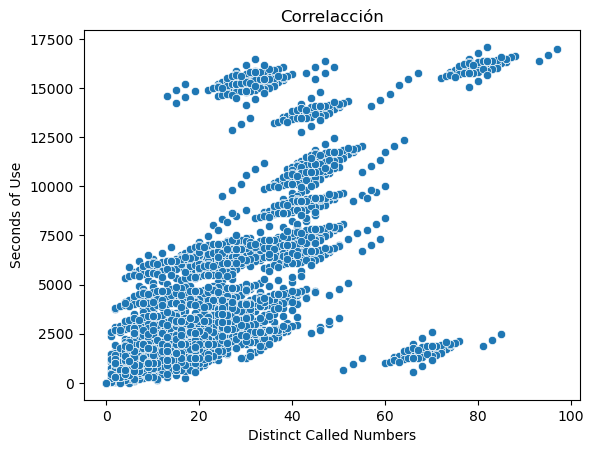

0.6765363049395241

In [ ]:
#Tener en cuenta solo variables numericas para análisis de las correlacciones
sns.scatterplot(x=df["Distinct Called Numbers"], y=df["Seconds of Use"])
plt.title("Correlacción")
plt.show()

df['Distinct Called Numbers'].corr(df['Seconds of Use'])

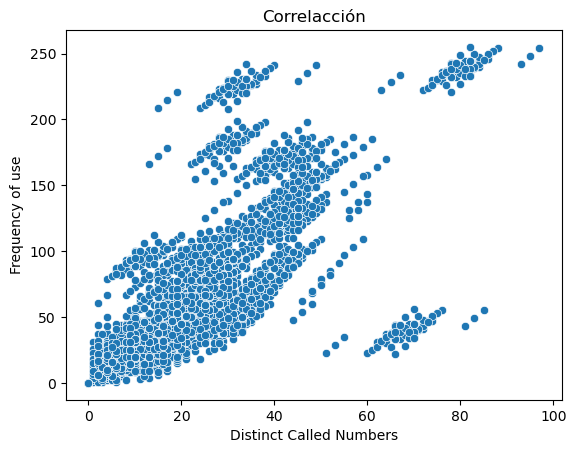

0.7361135333603925

In [ ]:
#Tener en cuenta solo variables numericas para análisis de las correlacciones
sns.scatterplot(x=df["Distinct Called Numbers"], y=df["Frequency of use"])
plt.title("Correlacción")
plt.show()

df['Distinct Called Numbers'].corr(df['Frequency of use'])

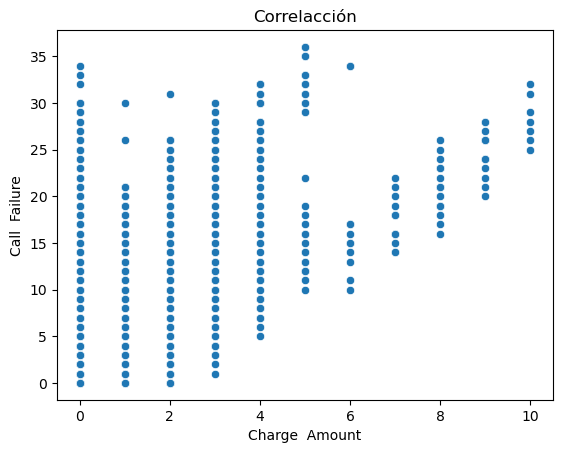

0.5890280071544304

In [ ]:
#Tener en cuenta solo variables numericas para análisis de las correlacciones
sns.scatterplot(x=df["Charge  Amount"], y=df["Call  Failure"])
plt.title("Correlacción")
plt.show()

df['Charge  Amount'].corr(df['Call  Failure'])

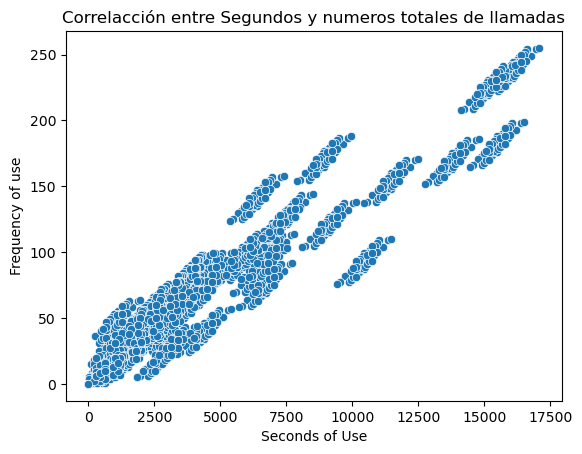

0.9464892281674099

In [ ]:
#Tener en cuenta solo variables numericas para análisis de las correlacciones
sns.scatterplot(x=df["Seconds of Use"], y=df["Frequency of use"])
plt.title("Correlacción entre Segundos y numeros totales de llamadas")
plt.show()

df['Seconds of Use'].corr(df['Frequency of use'])

##### Hay una correlacción positiva significativamente alta (0.94) entre el numero total de llamadas y los segundos totales de llamadas. Es decir, mientras más reaizan llamadas los clientes, hay una tendencia mayor a que los segundos en las mismas incrementen progesivamente.

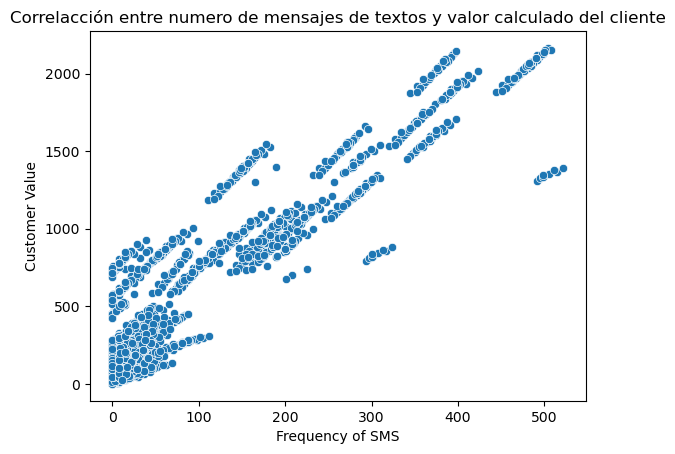

0.9248774260038424

In [ ]:
sns.scatterplot(x=df["Frequency of SMS"], y=df["Customer Value"])
plt.title("Correlacción entre numero de mensajes de textos y valor calculado del cliente")
plt.show()

df['Frequency of SMS'].corr(df['Customer Value'])

##### Hay una correlacción positiva significativamente alta (0.92) entre la frecuencia de SMS de los clientes y su valor calculado. Es decir, mientras más envian SMS, mayor sera el valor del cliente para la compañia; posiblemente porque un cliente que consuma mas es un cliente más valioso pues de el se recibira un pago mayor

In [ ]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

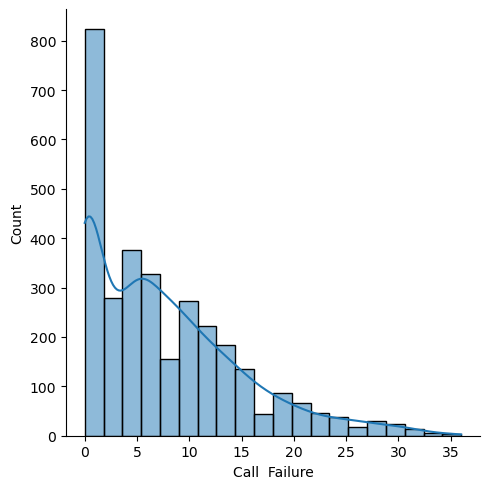

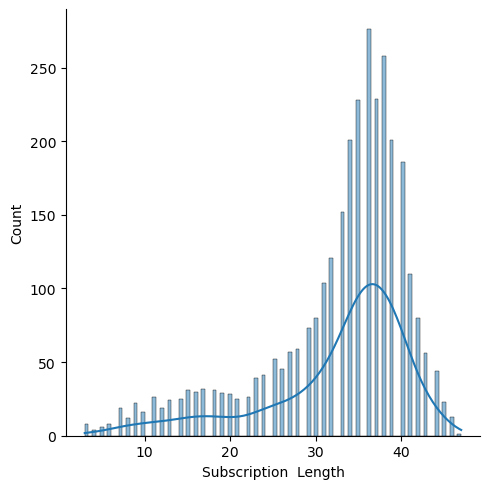

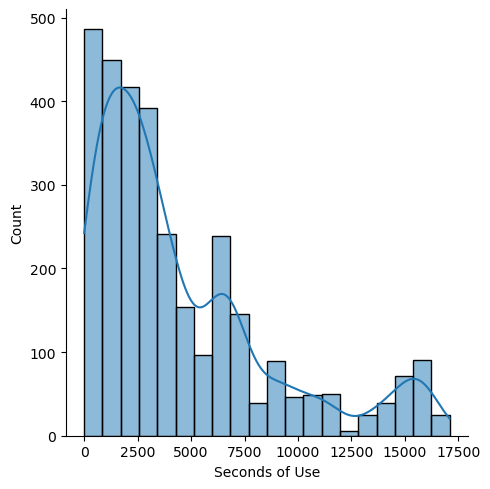

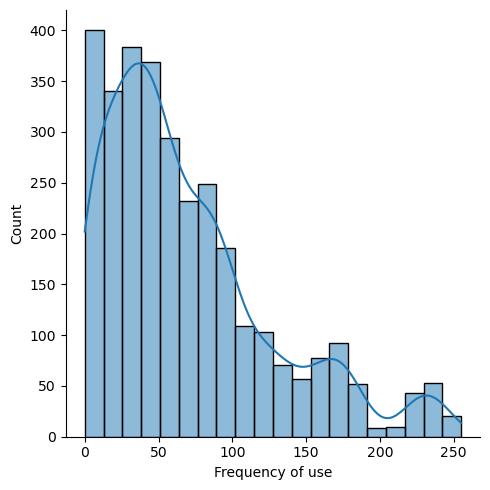

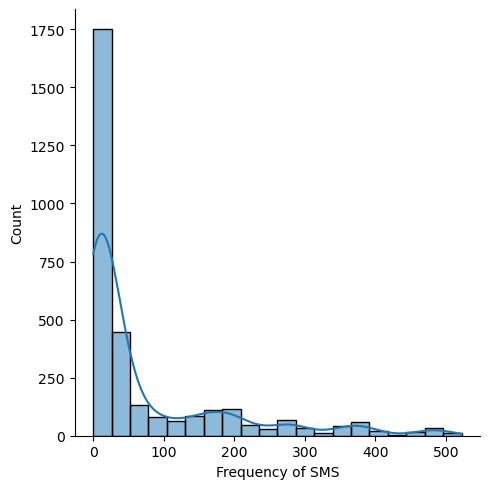

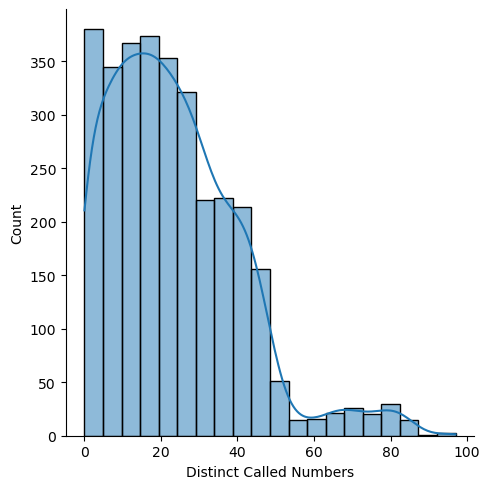

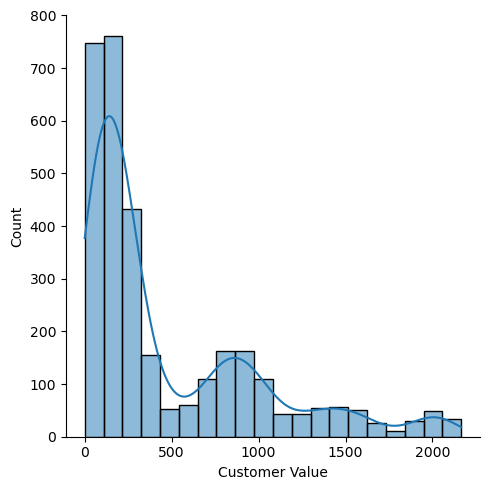

In [ ]:
sns.displot(df["Call  Failure"], bins = 20, kde = True)
sns.displot(df["Subscription  Length"], bins = 100, kde = True)
sns.displot(df["Seconds of Use"], bins = 20, kde = True)
sns.displot(df["Frequency of use"], bins = 20, kde = True)
sns.displot(df["Frequency of SMS"], bins = 20, kde = True)
sns.displot(df["Distinct Called Numbers"], bins = 20, kde = True)
sns.displot(df["Customer Value"], bins = 20, kde = True)

Limite inferior: -15.5
Limite superior: 28.5
IQR: 11.0


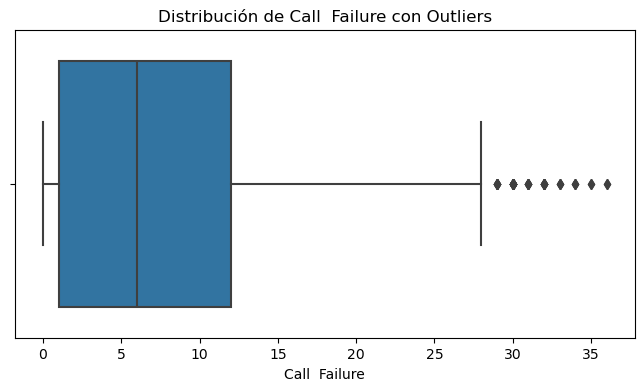

In [ ]:
#método de rango intercuartílico
Q1 = df["Call  Failure"].quantile(0.25)
Q3 = df["Call  Failure"].quantile(0.75)
IQR = Q3 - Q1

Limite_inferior = Q1 - 1.5*IQR
Limite_superior = Q3 + 1.5*IQR

Outliers = df[(df["Call  Failure"] < Limite_inferior) | (df["Call  Failure"] > Limite_superior)]

print(f"Limite inferior: {Limite_inferior}")
print(f"Limite superior: {Limite_superior}")
print(f"IQR: {IQR}")

#Graficar un boxplot para el análisis de datos atípicos (outliers) en una columna
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Call  Failure"])
plt.title("Distribución de Call  Failure con Outliers")
plt.show()

In [ ]:
df["Call  Failure"].std()

7.263885566996685

In [ ]:
#IQR≈1.349×STD
#IQR=11.0
#IQR / STD --> En una distribución normal, este valor tiende a ser ≈ 1.349.
print(7.26*1.349)
print(11/7.26)
#De acuerdo al análisis, se observa que no hay una distribucción normal
#Outilers concentrados a la izquierda

9.79374
1.5151515151515151


Limite inferior: 18.0
Limite superior: 50.0
IQR: 8.0


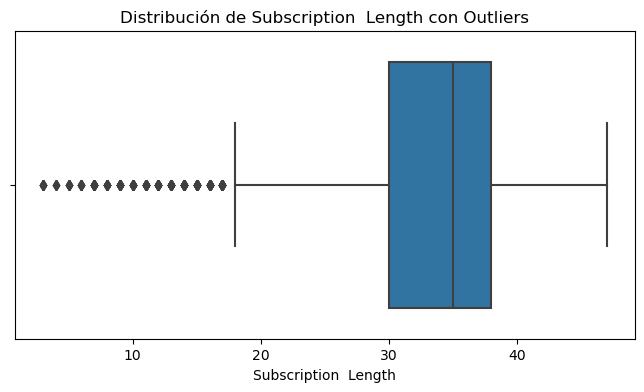

In [ ]:
#método de rango intercuartílico
Q1 = df["Subscription  Length"].quantile(0.25)
Q3 = df["Subscription  Length"].quantile(0.75)
IQR = Q3 - Q1

Limite_inferior = Q1 - 1.5*IQR
Limite_superior = Q3 + 1.5*IQR

Outliers = df[(df["Subscription  Length"] < Limite_inferior) | (df["Subscription  Length"] > Limite_superior)]

print(f"Limite inferior: {Limite_inferior}")
print(f"Limite superior: {Limite_superior}")
print(f"IQR: {IQR}")

#Graficar un boxplot para el análisis de datos atípicos (outliers) en una columna
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Subscription  Length"])
plt.title("Distribución de Subscription  Length con Outliers")
plt.show()

In [ ]:
df["Subscription  Length"].std()

8.573482061327244

In [ ]:
print(8/8.57)
#No se observa un comportamiento tipico de una distribuccion normal
#Outilers concentrados a la izquierda

0.9334889148191365


Limite inferior: -6239.25
Limite superior: 14108.75
IQR: 5087.0


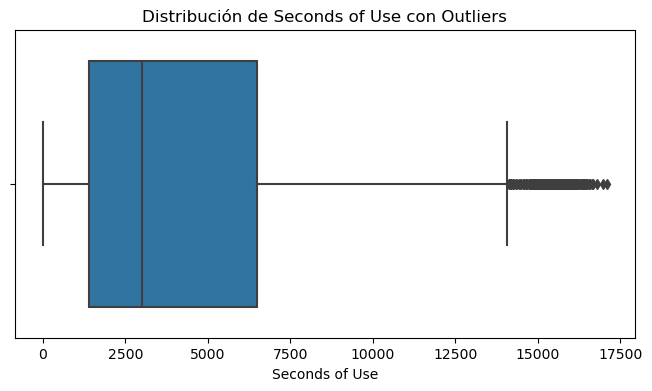

In [ ]:
#método de rango intercuartílico
Q1 = df["Seconds of Use"].quantile(0.25)
Q3 = df["Seconds of Use"].quantile(0.75)
IQR = Q3 - Q1

Limite_inferior = Q1 - 1.5*IQR
Limite_superior = Q3 + 1.5*IQR

Outliers = df[(df["Seconds of Use"] < Limite_inferior) | (df["Seconds of Use"] > Limite_superior)]

print(f"Limite inferior: {Limite_inferior}")
print(f"Limite superior: {Limite_superior}")
print(f"IQR: {IQR}")

#Graficar un boxplot para el análisis de datos atípicos (outliers) en una columna
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Seconds of Use"])
plt.title("Distribución de Seconds of Use con Outliers")
plt.show()

In [ ]:
df["Seconds of Use"].std()

4197.908686504337

In [ ]:
print(5087.0/4197.90)
#Para este caso, la distribucción tiene un comportamiento mejor, sin embargo no se refleja una distrubucción perfectamente normal
#Asimetria de la distribuccion a la izquierda
#Gran cantidad de outliers concentrados a la izquierda

1.2117963743776652


Limite inferior: -75.0
Limite superior: 197.0
IQR: 68.0


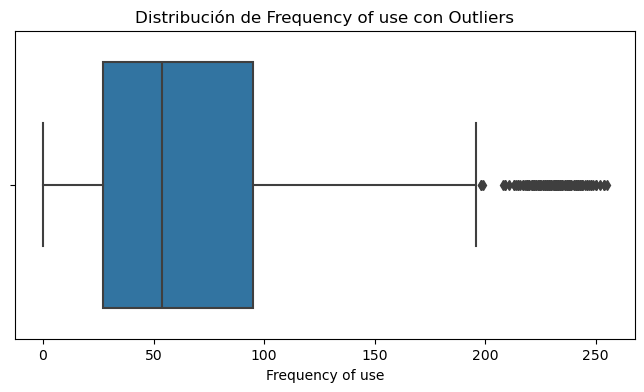

In [ ]:
#método de rango intercuartílico
Q1 = df["Frequency of use"].quantile(0.25)
Q3 = df["Frequency of use"].quantile(0.75)
IQR = Q3 - Q1

Limite_inferior = Q1 - 1.5*IQR
Limite_superior = Q3 + 1.5*IQR

Outliers = df[(df["Frequency of use"] < Limite_inferior) | (df["Frequency of use"] > Limite_superior)]

print(f"Limite inferior: {Limite_inferior}")
print(f"Limite superior: {Limite_superior}")
print(f"IQR: {IQR}")

#Graficar un boxplot para el análisis de datos atípicos (outliers) en una columna
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Frequency of use"])
plt.title("Distribución de Frequency of use con Outliers")
plt.show()

In [ ]:
df["Frequency of use"].std()

57.413307750633095

In [ ]:
print(68/57.41)
#No es clara una distribucción normal

1.1844626371712246


Limite inferior: -115.5
Limite superior: 208.5
IQR: 81.0


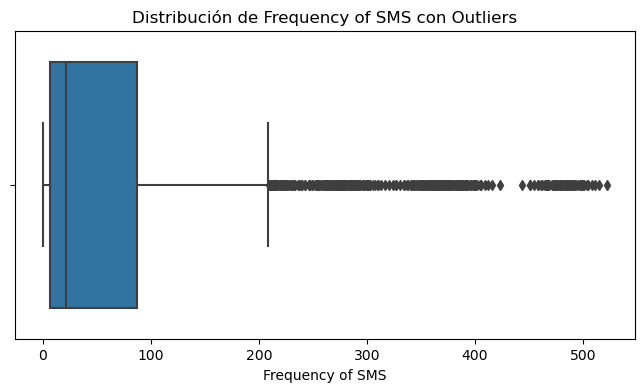

In [ ]:
#método de rango intercuartílico
Q1 = df["Frequency of SMS"].quantile(0.25)
Q3 = df["Frequency of SMS"].quantile(0.75)
IQR = Q3 - Q1

Limite_inferior = Q1 - 1.5*IQR
Limite_superior = Q3 + 1.5*IQR

Outliers = df[(df["Frequency of SMS"] < Limite_inferior) | (df["Frequency of SMS"] > Limite_superior)]

print(f"Limite inferior: {Limite_inferior}")
print(f"Limite superior: {Limite_superior}")
print(f"IQR: {IQR}")

#Graficar un boxplot para el análisis de datos atípicos (outliers) en una columna
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Frequency of SMS"])
plt.title("Distribución de Frequency of SMS con Outliers")
plt.show()

In [ ]:
df["Frequency of SMS"].std()

112.23755969319922

In [ ]:
print(81/112.23)

0.7217321571772253


Limite inferior: -26.0
Limite superior: 70.0
IQR: 24.0


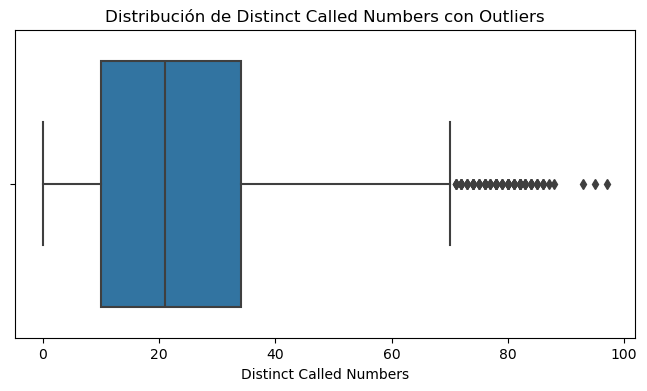

In [ ]:
#método de rango intercuartílico
Q1 = df["Distinct Called Numbers"].quantile(0.25)
Q3 = df["Distinct Called Numbers"].quantile(0.75)
IQR = Q3 - Q1

Limite_inferior = Q1 - 1.5*IQR
Limite_superior = Q3 + 1.5*IQR

Outliers = df[(df["Distinct Called Numbers"] < Limite_inferior) | (df["Distinct Called Numbers"] > Limite_superior)]

print(f"Limite inferior: {Limite_inferior}")
print(f"Limite superior: {Limite_superior}")
print(f"IQR: {IQR}")

#Graficar un boxplot para el análisis de datos atípicos (outliers) en una columna
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Distinct Called Numbers"])
plt.title("Distribución de Distinct Called Numbers con Outliers")
plt.show()

In [ ]:
df["Distinct Called Numbers"].std()

17.217337437991954

In [ ]:
print(24/17.21)

1.3945380592678676


Limite inferior: -898.0800000000002
Limite superior: 1800.2700000000002
IQR: 674.5875000000001


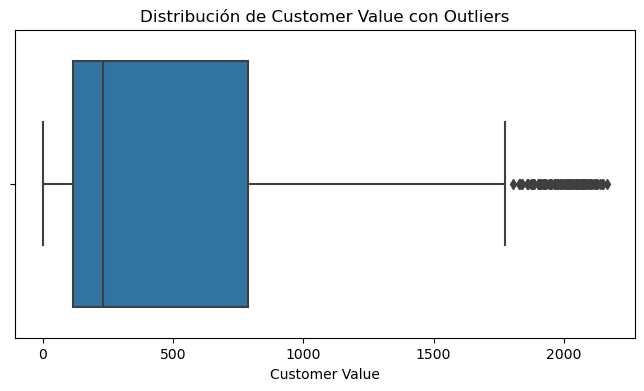

In [ ]:
#método de rango intercuartílico
Q1 = df["Customer Value"].quantile(0.25)
Q3 = df["Customer Value"].quantile(0.75)
IQR = Q3 - Q1

Limite_inferior = Q1 - 1.5*IQR
Limite_superior = Q3 + 1.5*IQR

Outliers = df[(df["Customer Value"] < Limite_inferior) | (df["Customer Value"] > Limite_superior)]

print(f"Limite inferior: {Limite_inferior}")
print(f"Limite superior: {Limite_superior}")
print(f"IQR: {IQR}")

#Graficar un boxplot para el análisis de datos atípicos (outliers) en una columna
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Customer Value"])
plt.title("Distribución de Customer Value con Outliers")
plt.show()

In [ ]:
df["Customer Value"].std()

517.0154327987642

In [ ]:
print(674.58/517.01)
#Aqui se observa un comportamiento mas normal, cercano a 1.349
#Asimetria a la derecha
#Gran cantidad de outilers a la izquierda

1.3047716678594226


In [ ]:
print(Outliers)

      Call  Failure  Complains  Subscription  Length  Charge  Amount  \
13                4          0                    38               1   
19                3          0                    37               0   
63                7          0                    40               2   
69                6          0                    39               1   
113               1          0                    36               0   
...             ...        ...                   ...             ...   
3013              3          0                    39               1   
3063              9          0                    40               2   
3069              8          0                    39               1   
3113              9          0                    40               2   
3119              8          0                    39               1   

      Seconds of Use  Frequency of use  Frequency of SMS  \
13              3095                27               483   
19             

##### Analisis de la distribución de “Subscription Length” para cada clase (Churn), describiendo si hay alguna incidencia de esta variable en la renuncia o no:

In [ ]:
#Aplicamos test de hipotesis
#Ho (Hipotesis nula): No hay diferencia significativa en la duración de la suscripción (en meses) entre los clientes que renuncian (churn) y los que no.
#h1 (Hipotesis alternativa): Sí hay una diferencia significativa en la duración de la suscripción entre los clientes que renuncian y los que no.

from scipy.stats import ttest_ind

# Separar los grupos según si el cliente renunció o no
grupo_churn = df[df["Churn"] == 1]["Subscription  Length"]
grupo_no_churn = df[df["Churn"] == 0]["Subscription  Length"]

# Prueba t de dos muestras independientes (Welch's t-test, no asume varianzas iguales)
t_stat, p_value = ttest_ind(grupo_churn, grupo_no_churn, equal_var=False)

# Mostrar resultados
print("Estadístico t:", round(t_stat, 3))
print("Valor p:", round(p_value, 4))

# Conclusión básica basada en el valor p
alpha = 0.05
#Si p-value < 0.05 --> se rechaza Ho
#Si ´-value >= 0.05 --> No se rechaza Ho
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en la duración de suscripción entre clientes que renuncian y los que no.")
else:
    print("No se rechaza la hipótesis nula: No hay evidencia suficiente para afirmar que exista una diferencia en la duración de suscripción entre los grupos.")

Estadístico t: -1.684
Valor p: 0.0926
No se rechaza la hipótesis nula: No hay evidencia suficiente para afirmar que exista una diferencia en la duración de suscripción entre los grupos.


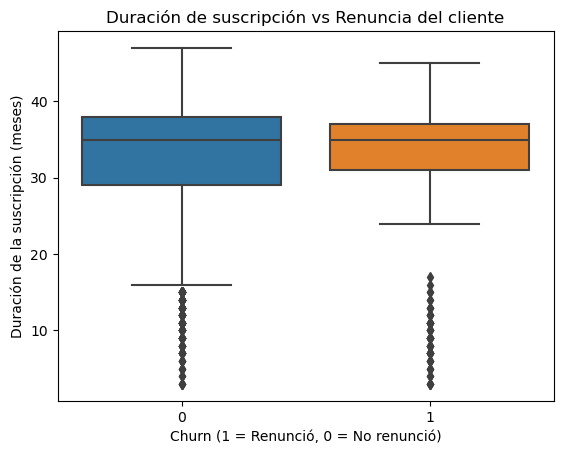

In [ ]:
sns.boxplot(x="Churn", y="Subscription  Length", data=df)
plt.title("Duración de suscripción vs Renuncia del cliente")
plt.xlabel("Churn (1 = Renunció, 0 = No renunció)")
plt.ylabel("Duración de la suscripción (meses)")
plt.show()

El test hipotesis nos dice que no hay dif significativa entre la duración de la subscripción y las renuncia -o no- de los clientes. En el boxplot podemos ver que para ambas categorias, churn tiene una mediana casi que igual alrededor de 35. Además, tienen datos atipicos aprox por debajo de 25. Las alturas de ambas cajas son similares. Finalmente, tiene una caja ligeramente más alta, lo que sugiere mas variabilidad en la duración.

In [ ]:
#Estandarización de variables regresoras
# Separar las variables regresoras (X) y la variable objetivo (y)
#Estandarizar solo variables numericas
X = df.drop("Churn", axis=1).select_dtypes(include=["float64", "int64"])
y = df["Churn"]

# Inicializar el estandarizador
scaler = StandardScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(X)

# Convertir de nuevo a DataFrame para mantener nombres de columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

#### PREDICCIONES Y APLICACIÓN DE MÉTRICAS

In [ ]:
#Convertir variables categoricas a tipo str para realizar balanceo de clases con SMOTE
df["Complains"] = df["Complains"].astype(str)
df["Age Group"] = df["Age Group"].astype(str)
df["Tariff Plan"] = df["Tariff Plan"].astype(str)
df["Status"] = df["Status"].astype(str)
df["Churn"] = df["Churn"].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   object 
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   object 
 9   Tariff Plan              3150 non-null   object 
 10  Status                   3150 non-null   object 
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   object 
dtypes: float64(1), int64(8),

In [ ]:
# Frecuencia absoluta
print(df["Churn"].value_counts())

# Frecuencia relativa (%)
print(df["Churn"].value_counts(normalize=True) * 100)

Churn
0    2655
1     495
Name: count, dtype: int64
Churn
0    84.285714
1    15.714286
Name: proportion, dtype: float64


In [ ]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Separar variables independientes (X) y dependiente (y)
X = df.drop("Churn", axis=1)
y = df["Churn"]

X = X.select_dtypes(include=["float64", "int64"])

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state=23)

# Aplicar SMOTE al set de entrenamiento
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Mostrar nuevas proporciones
print("Distribución original:")
print(y_train.value_counts())
print("\nDistribución después de SMOTE:")
print(pd.Series(y_resampled).value_counts())

Distribución original:
Churn
0    1777
1     333
Name: count, dtype: int64

Distribución después de SMOTE:
Churn
0    1777
1    1777
Name: count, dtype: int64


In [ ]:
# Entrenar el modelo con hiperparámetros por defecto
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Predicción en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Mostrar métricas (incluye F1-score por clase)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       878
           1       0.82      0.83      0.83       162

    accuracy                           0.95      1040
   macro avg       0.90      0.90      0.90      1040
weighted avg       0.95      0.95      0.95      1040



In [ ]:
top7_features = feature_importance_df.sort_values(by="Importance", ascending=False).head(7)["Feature"].tolist()

In [ ]:
# Usar solo esas 7 columnas en X_resampled
X_train_top7 = X_resampled[top7_features]
y_train_top7 = y_resampled

In [ ]:
# Importancia de características
importances = rf_model.feature_importances_
features = X_resampled.columns

# Crear DataFrame y ordenarlo
feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Mostrar las 7 más importantes
print("Top 7 características más importantes:")
print(feature_importance_df.head(7))

Top 7 características más importantes:
                Feature  Importance
4      Frequency of use    0.182901
3        Seconds of Use    0.168719
8        Customer Value    0.152979
1  Subscription  Length    0.101722
5      Frequency of SMS    0.099364
7                   Age    0.086450
0         Call  Failure    0.075823


In [ ]:
pip install tensorflow

  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl (375.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
print(X_train_top7.dtypes)

Frequency of use          int64
Seconds of Use            int64
Customer Value          float64
Subscription  Length      int64
Frequency of SMS          int64
Age                       int64
Call  Failure             int64
dtype: object


In [ ]:
X_train_top7 = X_train_top7.apply(pd.to_numeric, errors='coerce')

In [ ]:
print(X_train_top7.isnull().sum())

Frequency of use        0
Seconds of Use          0
Customer Value          0
Subscription  Length    0
Frequency of SMS        0
Age                     0
Call  Failure           0
dtype: int64


In [ ]:
print(X_train_top7.dtypes)
print(X_train_top7.shape)
print(y_train_top7.shape)

Frequency of use          int64
Seconds of Use            int64
Customer Value          float64
Subscription  Length      int64
Frequency of SMS          int64
Age                       int64
Call  Failure             int64
dtype: object
(3554, 7)
(3554,)


In [ ]:
X_train_top7 = X_train_top7.reset_index(drop=True)
y_train_top7 = y_train_top7.reset_index(drop=True)

In [ ]:
print(type(X_train_top7.values))
print(X_train_top7.values.dtype)

<class 'numpy.ndarray'>
float64


In [ ]:
y_train_top7 = y_train_top7.astype('float64')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Modelo con una sola capa oculta
model = Sequential()
model.add(Dense(64, input_dim=7, activation='relu'))  # Capa oculta con 16 neuronas y ReLU
model.add(Dense(1, activation='sigmoid'))  # Capa de salida con activación sigmoide (binaria)

# Optimizador: Descenso del gradiente estocástico
optimizer = SGD(learning_rate=0.0001)

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['AUC'])

# Entrenar el modelo
history = model.fit(X_train_top7, y_train_top7, epochs=3964, batch_size=32, verbose=1)

Epoch 1/3964


C:\Users\Usuario\.ms-ad\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5205 - loss: 82.1881   
Epoch 2/3964
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.6049 - loss: 6.1811 
Epoch 3/3964
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7566 - loss: 0.8940 
Epoch 4/3964
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.7792 - loss: 0.6659
Epoch 5/3964
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8007 - loss: 0.5749
Epoch 6/3964
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8012 - loss: 0.5714
Epoch 7/3964
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8141 - loss: 0.5437
Epoch 8/3964
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8126 - loss: 0.5680
Epoch 9/3964
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8224 - loss: 0.5274
Epoch 10/3964
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8201 - loss: 0.5271  
Epoch 11/3964
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8235 - loss: 0.5240  
Epoch 12/3964
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - AUC: 0.8215 - loss: 0.5294
Epoc

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step
AUC: 0.9210


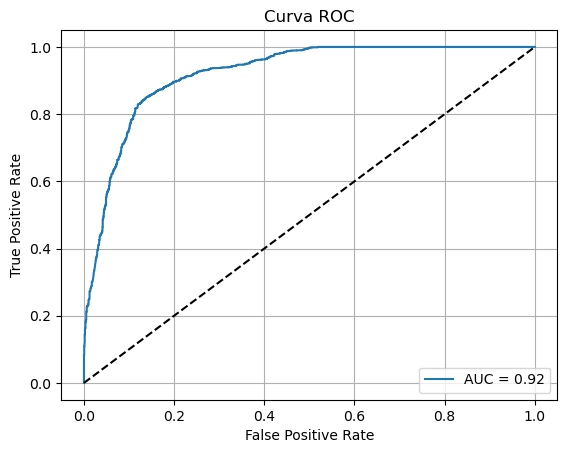

In [ ]:
# Obtener probabilidades predichas
y_pred_proba = model.predict(X_train_top7).ravel()

# Calcular AUC
auc = roc_auc_score(y_train_top7, y_pred_proba)
print(f"AUC: {auc:.4f}")

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_train_top7, y_pred_proba)

# Graficar
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Se alcanzo un AUC: 0.9210 con una función de perdida que fue bajando progresivamente permitiendo que el modelo aprendiera (loss final = 0.3633)

Neuronas ocultas: 64

Learning rate: 0.0001

Epocas = 3964

Para lo anterior, se fueron aumentando las épocas para permitir que el modelo aprendiera mejor bajo patrones complejos, se procedio tambien a disminuir la tasa de aprendizaje llevando a uno mas fino y aumentando las neuronas ocultas para permitir una mejor capacidad de aprendizaje.

Con base a lo anterior, se observo que AUC iba aumentando mejorando la medición del rendimiento del modelo para clasificar correctamente y loss (medición del error interno) iba disminuyendo.